## Agenda
- Salting and peppering the input image to produce noise.

### Noise
- Random Phenomenon
- Noisy Image -> Image Acquisition, transmission

#### Type of Noise:
- **Additive Noise** - Gaussian Noise
- **Mulitplicative Noise** - Speckle Noise (Ultrasound images)
- **Impulse Noise** - Salt & Pepper Noise
- **Periodic Noise** - Periodic Noise/Sinusoidal Gravity Pattern
 
#### Salt & Pepper Noise
- Random occurunce of black and white pixels

In [39]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cv2

In [22]:
img = cv2.imread('cameraman.tif', 0)
m, n = img.shape
m, n

(256, 256)

Parameters required now:

- Probability = 0.1
- Threshold = 1 - prob

In [48]:
probability = 0.1
threshold = 1 - probability
img_noise = np.zeros((m, n))

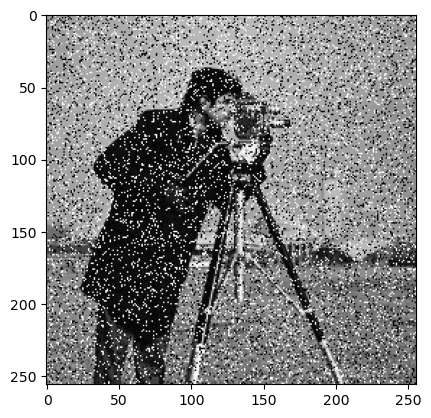

In [49]:
for i in range(m):
    for j in range(n):
        rnd = np.random.random()
        if  rnd < probability:
            img_noise[i, j] = 0
        elif rnd > threshold:
            img_noise[i, j] = 255
        else:
            img_noise[i, j] = img[i, j]
            
plt.imshow(img_noise, cmap='gray')

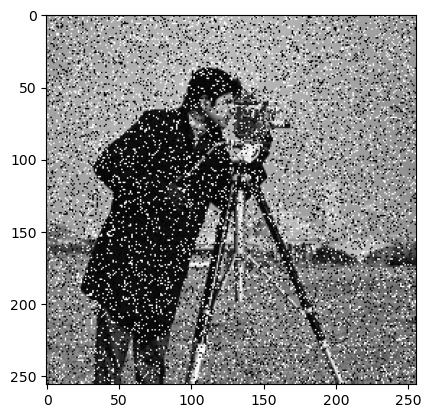

In [50]:
rnd = np.random.random((m, n))

# Initialize noisy image with a copy of the original image
img_noise2 = np.copy(img)

# Apply noise based on conditions using vectorized operations
img_noise2[rnd < probability] = 0
img_noise2[rnd > threshold] = 255

# Display the noisy image
plt.imshow(img_noise2, cmap='gray')

### Mitigate this noise? use Median Filter.

- bro lives in scipy as scipy.signal

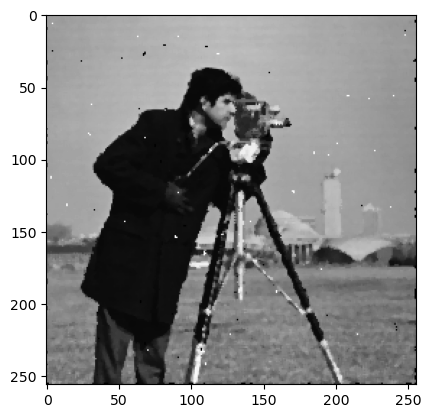

In [53]:
median_filtered_img = signal.medfilt2d(img_noise)
plt.imshow(median_filtered_img, cmap='gray')

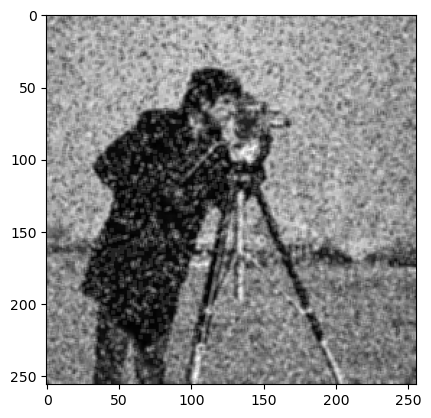

In [56]:
h = 1/9 * np.ones((3, 3))
mean_filtered_img = cv2.filter2D(img_noise, -1, h)
plt.imshow(mean_filtered_img, cmap='gray')

## Edge
- Represents sharp change in graylevel
- Represent "discontinuity"

#### Types
- Step edge
- Ramp edge
- Roof edge

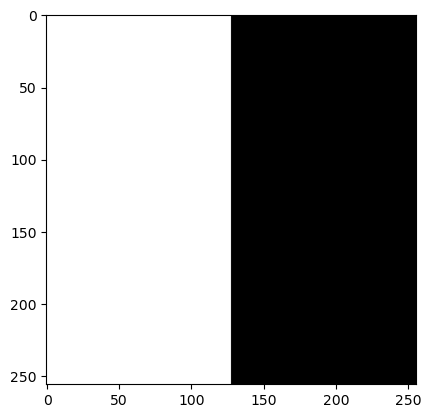

In [61]:
img = np.zeros((256,256))
img[:, :128] = 255 # Step edge
plt.imshow(img, cmap='gray')

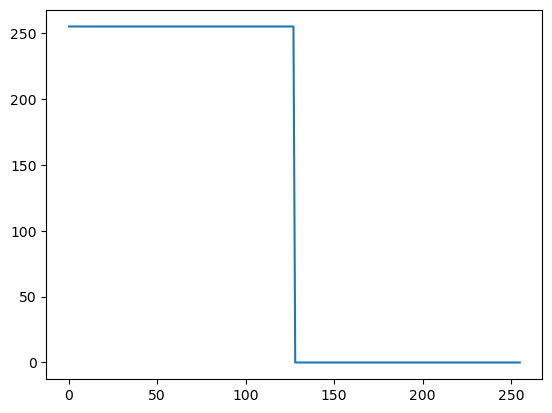

In [62]:
plt.plot(img[128])

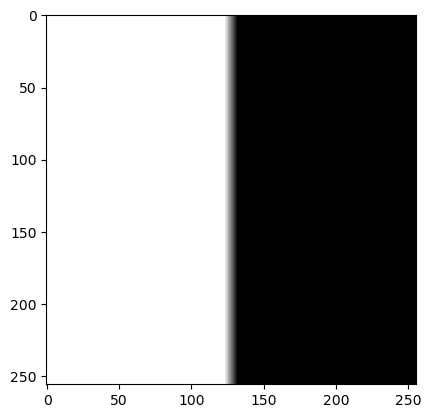

In [73]:
edgeywedgy = cv2.filter2D(img, -1, 1/9 * np.ones((9, 9)))
plt.imshow(edgeywedgy, cmap='gray')

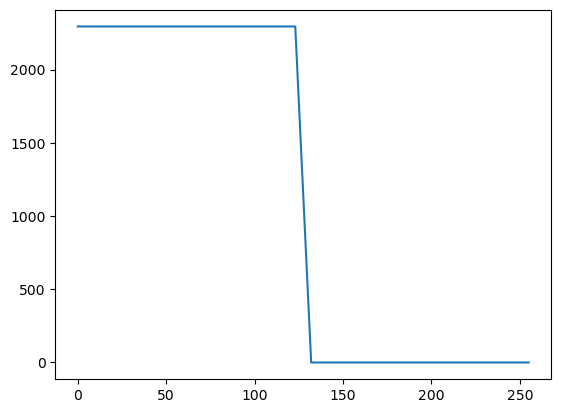

In [74]:
plt.plot(edgeywedgy[128])

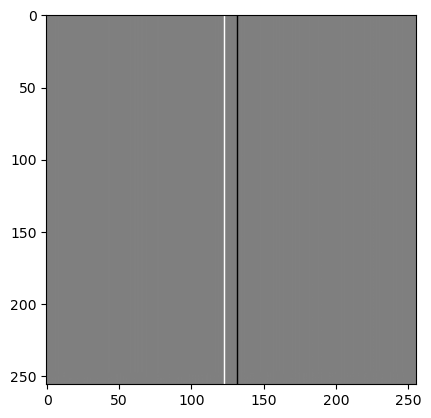

In [76]:
plt.imshow(cv2.filter2D(edgeywedgy, -1, np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])), cmap='gray')

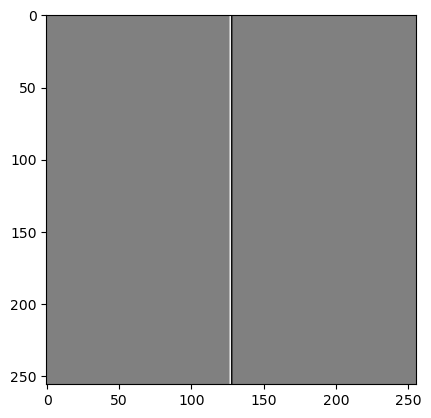

In [77]:
plt.imshow(cv2.filter2D(img, -1, np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])), cmap='gray')